In [83]:
#supervised classification problem
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [84]:
#Bunch class similar to dict in python
print("Keys of iris dataset: \n{}".format(iris_dataset.keys()))

Keys of iris dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [85]:
print(iris_dataset['DESCR'][:200], "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive 
...


In [86]:
print("Target names : \n{}".format(iris_dataset["target_names"]))

Target names : 
['setosa' 'versicolor' 'virginica']


In [87]:
print("Feature names : \n{}".format(iris_dataset["feature_names"]))

Feature names : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [88]:
print("Type of data : \n{}".format(type(iris_dataset["data"])))

Type of data : 
<class 'numpy.ndarray'>


In [89]:
print("Shape of data : \n{}".format(iris_dataset["data"].shape))

Shape of data : 
(150, 4)


In [90]:
print("First five columns of data : \n{}".format(iris_dataset["data"][:5]))

First five columns of data : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [91]:
print("Shape of target : \n{}".format(iris_dataset["target"].shape))

Shape of target : 
(150,)


In [92]:
print("Target : \n {}".format(iris_dataset["target"]))

Target : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"], random_state = 0)
print("X_train shape : {} \ny_train shape : {}".format(X_train.shape,y_train.shape))

X_train shape : (112, 4) 
y_train shape : (112,)


In [94]:
print("X_test shape : {} \ny_test shape : {}".format(X_test.shape,y_test.shape))

X_test shape : (38, 4) 
y_test shape : (38,)


In [95]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix

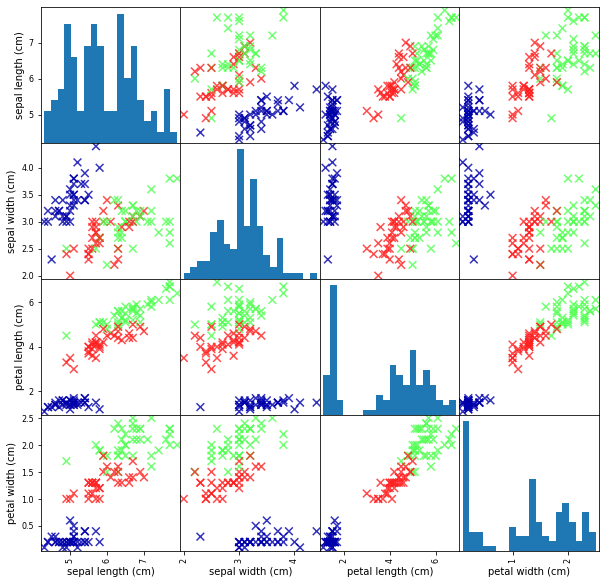

In [96]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset["feature_names"])

#pair plot of iris dataset coloured by class labels
grr = scatter_matrix(iris_df, c=y_train, figsize=(10, 10), marker='x', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [105]:
#fitting the data into a model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [106]:
#test object
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape : \n{}".format(X_new.shape))

X_new.shape : 
(1, 4)


In [107]:
#predicting the class of test object using the model
prediction = knn.predict(X_new)
print("Prediction : {}".format(prediction))
print("Prediction target class : {}".format(iris_dataset["target_names"][prediction]))

Prediction : [0]
Prediction target class : ['setosa']


In [109]:
#Evaluating the model
y_pred = knn.predict(X_test)
print("Test set predictions : \n{}".format(y_pred))

Test set predictions : 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [113]:
print("Test set score : {:.2f}".format(np.mean(y_pred==y_test)))

Test set score : 0.97


In [114]:
#Using score method of the knn object to print the accuracy
print("Test set score : {:.2f}".format(knn.score(X_test,y_test)))

Test set score : 0.97
